In [56]:
# Pandas
import pandas as pd

In [57]:
data = pd.read_csv("salary/salary_features.csv")
data.dropna(inplace=True)
data.head()
max = 5

In [58]:
sliced_x = data.iloc[:max,0:3].join(data.iloc[:max,4:8])
sliced_x.head()

,Rating,Company Name,Job Title,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,3,Bangalore,Full Time,Android


In [59]:
sliced_y = data.iloc[:max,3:4]
# sliced_y.head()

In [60]:
from sklearn.preprocessing import LabelEncoder
toBeEncoded = ['Company Name','Job Title','Location','Employment Status','Job Roles']
encoder = LabelEncoder()
for col in toBeEncoded:
    sliced_x[col] = encoder.fit_transform(sliced_x[col])

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
from sklearn.model_selection import train_test_split

train_x , test_x , train_y, test_y = train_test_split(sliced_x,sliced_y,test_size=0.3)

In [63]:
classifier = DecisionTreeClassifier()
classifier.fit(train_x,train_y)

DecisionTreeClassifier()

In [64]:
classifier.predict(test_x)

array([300000, 400000])

In [65]:
from sklearn import tree

[Text(0.4, 0.8333333333333334, 'Company Name <= 1.5\ngini = 0.667\nsamples = 3\nvalue = [1, 1, 1]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.6, 0.5, 'Company Name <= 3.5\ngini = 0.5\nsamples = 2\nvalue = [1, 0, 1]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]')]

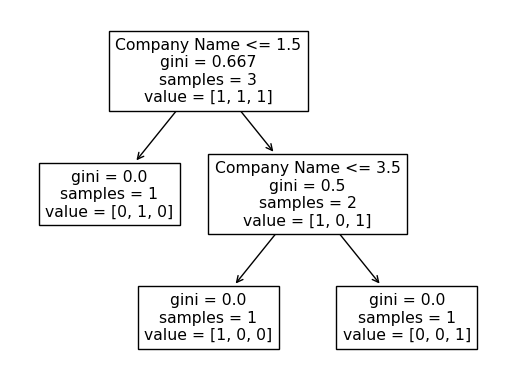

In [66]:
tree.plot_tree(classifier,feature_names=sliced_x.columns)